###0.1 installation

In [1]:
!pip install d2l==1.0.3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.9/58.9 kB 1.5 MB/s eta 0:00:00
  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.7/111.7 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 50.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 48.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 42.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.6/62.6 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 15.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.3/98.3 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.7/124.7 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.5/93.5 kB 4.9 MB/s eta 0:00:00
Using cached jedi-0.19.1-py2.py3-none-any.whl (1.6 MB)
  Attempting uninstall: requests
    Found existing installation: requests 2.32.3
    Unin

##5.1. Multilayer Perceptrons

In [1]:
%matplotlib inline
import torch
from d2l import torch as d2l

###5.1.1. Hidden Layers

####5.1.1.1. Limitations of Linear Models

####5.1.1.2. Incorporating Hidden Layers

####5.1.1.3. From Linear to Nonlinea

$$
\begin{aligned}
    \mathbf{H} & = \mathbf{X} \mathbf{W}^{(1)} + \mathbf{b}^{(1)}, \\
    \mathbf{O} & = \mathbf{H}\mathbf{W}^{(2)} + \mathbf{b}^{(2)}.
\end{aligned}
$$

$$
\mathbf{O} = (\mathbf{X} \mathbf{W}^{(1)} + \mathbf{b}^{(1)})\mathbf{W}^{(2)} + \mathbf{b}^{(2)} = \mathbf{X} \mathbf{W}^{(1)}\mathbf{W}^{(2)} + \mathbf{b}^{(1)} \mathbf{W}^{(2)} + \mathbf{b}^{(2)} = \mathbf{X} \mathbf{W} + \mathbf{b}.
$$

$$
\begin{aligned}
    \mathbf{H} & = \sigma(\mathbf{X} \mathbf{W}^{(1)} + \mathbf{b}^{(1)}), \\
    \mathbf{O} & = \mathbf{H}\mathbf{W}^{(2)} + \mathbf{b}^{(2)}.\\
\end{aligned}
$$

####5.1.1.4. Universal Approximators

###5.1.2. Activation Functions

####5.1.2.1. ReLU Function

$$\operatorname{ReLU}(x) = \max(x, 0).$$

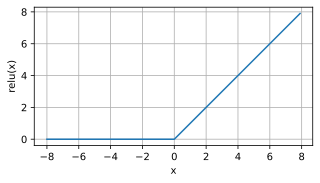

In [2]:
x = torch.arange(-8.0, 8.0, 0.1, requires_grad=True)
y = torch.relu(x)
d2l.plot(x.detach(), y.detach(), 'x', 'relu(x)', figsize=(5, 2.5))

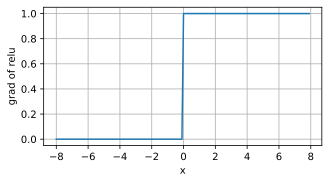

In [3]:
y.backward(torch.ones_like(x), retain_graph=True)
d2l.plot(x.detach(), x.grad, 'x', 'grad of relu', figsize=(5, 2.5))

$$\operatorname{pReLU}(x) = \max(0, x) + \alpha \min(0, x).$$

####5.1.2.2. Sigmoid Function


$$\operatorname{sigmoid}(x) = \frac{1}{1 + \exp(-x)}.$$

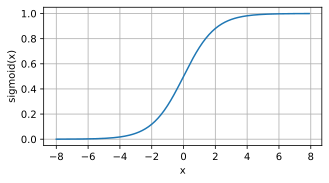

In [4]:
y = torch.sigmoid(x)
d2l.plot(x.detach(), y.detach(), 'x', 'sigmoid(x)', figsize=(5, 2.5))

$$\frac{d}{dx} \operatorname{sigmoid}(x) = \frac{\exp(-x)}{(1 + \exp(-x))^2} = \operatorname{sigmoid}(x)\left(1-\operatorname{sigmoid}(x)\right).$$

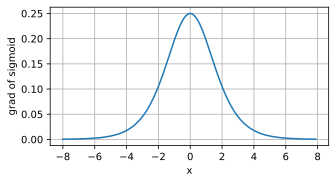

In [5]:
x.grad.data.zero_()
y.backward(torch.ones_like(x),retain_graph=True)
d2l.plot(x.detach(), x.grad, 'x', 'grad of sigmoid', figsize=(5, 2.5))

####5.1.2.3. Tanh Function


$$\operatorname{tanh}(x) = \frac{1 - \exp(-2x)}{1 + \exp(-2x)}.$$

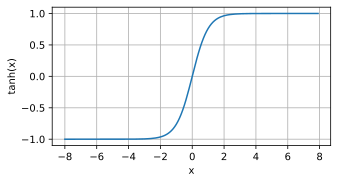

In [6]:
y = torch.tanh(x)
d2l.plot(x.detach(), y.detach(), 'x', 'tanh(x)', figsize=(5, 2.5))

$$\frac{d}{dx} \operatorname{tanh}(x) = 1 - \operatorname{tanh}^2(x).$$

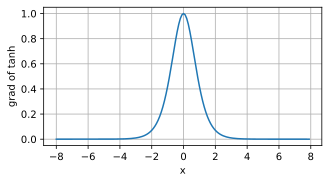

In [7]:
x.grad.data.zero_()
y.backward(torch.ones_like(x),retain_graph=True)
d2l.plot(x.detach(), x.grad, 'x', 'grad of tanh', figsize=(5, 2.5))

###5.1.3. Discussion & Exercises

####5.1.3.1. My Own Exercises

Leaky ReLu
$$\text{Leaky ReLU}(x) = \begin{cases} x & \text{if } x > 0 \\ \alpha x & \text{if } x \leq 0 \end{cases}$$


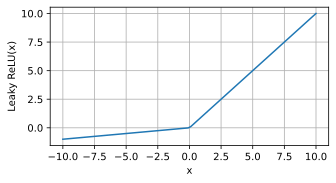

In [8]:
leaky_relu = torch.nn.LeakyReLU(negative_slope=0.1)
x = torch.linspace(-10, 10, 100, requires_grad=True)
y = leaky_relu(x)
d2l.plot(x.detach(), y.detach(), 'x', 'Leaky ReLU(x)', figsize=(5, 2.5))

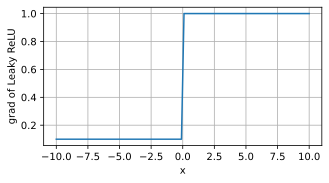

In [9]:
x.grad = None
y.backward(torch.ones_like(x))
d2l.plot(x.detach().numpy(), x.grad.detach().numpy(), 'x', 'grad of Leaky ReLU', figsize=(5, 2.5))

ELU

$$\text{ELU}(x) = \begin{cases} x & \text{if } x > 0 \\ \alpha (\exp(x) - 1) & \text{if } x \leq 0 \end{cases}$$

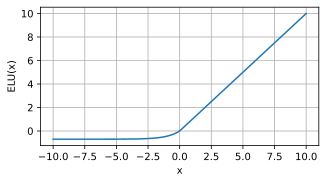

In [10]:
elu = torch.nn.ELU(alpha=0.7)
x = torch.linspace(-10, 10, 100, requires_grad=True)
y = elu(x)
d2l.plot(x.detach(), y.detach(), 'x', 'ELU(x)', figsize=(5, 2.5))

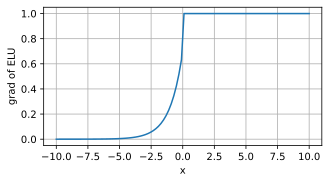

In [11]:
x.grad = None
y.backward(torch.ones_like(x))
d2l.plot(x.detach().numpy(), x.grad.detach().numpy(), 'x', 'grad of ELU', figsize=(5, 2.5))

##5.2. Implementation of Multilayer Perceptrons

In [12]:
import torch
from torch import nn
from d2l import torch as d2l

###5.2.1. Implementation from Scratch

####5.2.1.1. Initializing Model Parameters

In [13]:
class MLPScratch(d2l.Classifier):
    def __init__(self, num_inputs, num_outputs, num_hiddens, lr, sigma=0.01):
        super().__init__()
        self.save_hyperparameters()
        self.W1 = nn.Parameter(torch.randn(num_inputs, num_hiddens) * sigma)
        self.b1 = nn.Parameter(torch.zeros(num_hiddens))
        self.W2 = nn.Parameter(torch.randn(num_hiddens, num_outputs) * sigma)
        self.b2 = nn.Parameter(torch.zeros(num_outputs))

####5.2.1.2. Model

In [14]:
def relu(X):
    a = torch.zeros_like(X)
    return torch.max(X, a)

In [15]:
@d2l.add_to_class(MLPScratch)
def forward(self, X):
    X = X.reshape((-1, self.num_inputs))
    H = relu(torch.matmul(X, self.W1) + self.b1)
    return torch.matmul(H, self.W2) + self.b2

####5.2.1.3. Training

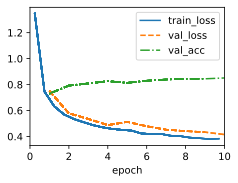

In [16]:
model = MLPScratch(num_inputs=784, num_outputs=10, num_hiddens=256, lr=0.1)
data = d2l.FashionMNIST(batch_size=256)
trainer = d2l.Trainer(max_epochs=10)
trainer.fit(model, data)

###5.2.2. Concise Implementation

####5.2.2.1. Model

In [17]:
class MLP(d2l.Classifier):
    def __init__(self, num_outputs, num_hiddens, lr):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential(nn.Flatten(), nn.LazyLinear(num_hiddens),
                                 nn.ReLU(), nn.LazyLinear(num_outputs))

####5.2.2.2. Training

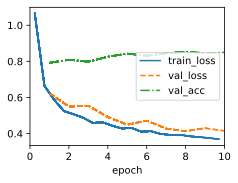

In [18]:
model = MLP(num_outputs=10, num_hiddens=256, lr=0.1)
trainer.fit(model, data)

###5.2.3. Discussion & Exercises

##### 5.2.3.1. My Own Exercises

**1.** Why is it a bad idea to insert a hidden layer with a single neuron? What could go wrong? -> 하나의 뉴런으로 이루어진 layer는 모든 값을 하나로 압축하기 때문에 정보 손실이 발생함.

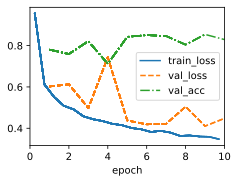

In [19]:
model = MLP(num_outputs=10, num_hiddens=2048, lr=0.1)
trainer.fit(model, data)

layer의 parameter가 늘어났지만, 초반에 validaiton loss 또한 증가하였다. 아마도 첫 에폭에서 파라미터들이 이전보다 복잡해져 제대로 학습되지 않은 까닭으로 보인다. 그러나 학습이 진행됨에 따라 validation loss가 안정적으로 감소하며, validation accuracy도 안정적으로 증가하는 양상이다.


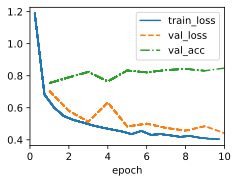

In [20]:
model = MLP(num_outputs=10, num_hiddens=16, lr=0.1)
trainer.fit(model, data)

layer의 parameter가 줄어듦에 따라 validation loss가 불안정하게 변화하는 것을 볼 수 있다. epoch이 늘어날수록 loss가 줄어들기는 하나, 심하게 요동치는 모습이다. 또한, validation accuracy의 증가율이 높지 않다.

##5.3. Forward Propagation, Backward Propagation, and Computational Graphs

###5.3.1. Forward Propagation

$$\mathbf{z}= \mathbf{W}^{(1)} \mathbf{x},$$

$$\mathbf{h}= \phi (\mathbf{z}).$$

$$\mathbf{o}= \mathbf{W}^{(2)} \mathbf{h}.$$

$$L = l(\mathbf{o}, y).$$

$$s = \frac{\lambda}{2} \left(\|\mathbf{W}^{(1)}\|_\textrm{F}^2 + \|\mathbf{W}^{(2)}\|_\textrm{F}^2\right),$$

$$J = L + s.$$

### 5.3.2. Computational Graph of Forward Propagation

###5.3.3. Backpropagation

$$\frac{\partial \mathsf{Z}}{\partial \mathsf{X}} = \textrm{prod}\left(\frac{\partial \mathsf{Z}}{\partial \mathsf{Y}}, \frac{\partial \mathsf{Y}}{\partial \mathsf{X}}\right).$$

$$\frac{\partial J}{\partial L} = 1 \; \textrm{and} \; \frac{\partial J}{\partial s} = 1.$$

$$
\frac{\partial J}{\partial \mathbf{o}}
= \textrm{prod}\left(\frac{\partial J}{\partial L}, \frac{\partial L}{\partial \mathbf{o}}\right)
= \frac{\partial L}{\partial \mathbf{o}}
\in \mathbb{R}^q.
$$

$$\frac{\partial s}{\partial \mathbf{W}^{(1)}} = \lambda \mathbf{W}^{(1)}
\; \textrm{and} \;
\frac{\partial s}{\partial \mathbf{W}^{(2)}} = \lambda \mathbf{W}^{(2)}.$$

$$\frac{\partial J}{\partial \mathbf{W}^{(2)}}= \textrm{prod}\left(\frac{\partial J}{\partial \mathbf{o}}, \frac{\partial \mathbf{o}}{\partial \mathbf{W}^{(2)}}\right) + \textrm{prod}\left(\frac{\partial J}{\partial s}, \frac{\partial s}{\partial \mathbf{W}^{(2)}}\right)= \frac{\partial J}{\partial \mathbf{o}} \mathbf{h}^\top + \lambda \mathbf{W}^{(2)}.$$

$$
\frac{\partial J}{\partial \mathbf{h}}
= \textrm{prod}\left(\frac{\partial J}{\partial \mathbf{o}}, \frac{\partial \mathbf{o}}{\partial \mathbf{h}}\right)
= {\mathbf{W}^{(2)}}^\top \frac{\partial J}{\partial \mathbf{o}}.
$$



$$
\frac{\partial J}{\partial \mathbf{z}}
= \textrm{prod}\left(\frac{\partial J}{\partial \mathbf{h}}, \frac{\partial \mathbf{h}}{\partial \mathbf{z}}\right)
= \frac{\partial J}{\partial \mathbf{h}} \odot \phi'\left(\mathbf{z}\right).
$$

$$
\frac{\partial J}{\partial \mathbf{W}^{(1)}}
= \textrm{prod}\left(\frac{\partial J}{\partial \mathbf{z}}, \frac{\partial \mathbf{z}}{\partial \mathbf{W}^{(1)}}\right) + \textrm{prod}\left(\frac{\partial J}{\partial s}, \frac{\partial s}{\partial \mathbf{W}^{(1)}}\right)
= \frac{\partial J}{\partial \mathbf{z}} \mathbf{x}^\top + \lambda \mathbf{W}^{(1)}.
$$

###5.3.4. Training Neural Networks

###5.3.5. Discussion & Exercises

**1.** What are the advantages and disadvantages over training on a smaller minibatch? -> 미니배치로 학습하면 학습에 사용되는 메모리를 줄일 수 있다. 또한 가중치 업데이트가 잦아 빠른 피드백이 가능하다. 다만, 에포크 당 업데이트 횟수가 늘어나기에 총 학습시간은 증가할 수 있으며, 미니배치를 정규화하지 않으면 데이터셋의 분포가 미니배치마다 달라 Loss function이 불안정하게 변동할 수 있다.

**2.** Assume that the inputs $\mathbf{X}$ to some scalar function $f$ are $n \times m$ matrices. What is the dimensionality of the gradient of $f$ with respect to $\mathbf{X}$? -> $f$의 output은 scalar지만 gradient의 차원은 기존의 input과 같은 $n \times m$임.